In [8]:
import cv2
import imutils
import imutils.perspective as presp
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

Number of pipes are: 10


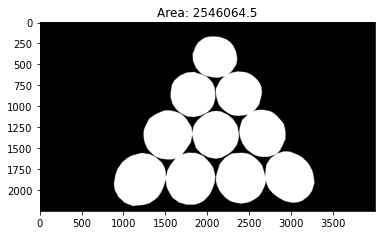

In [9]:
def grab_contours(cnts):
    # OpenCV v2.4, v4-official
    if len(cnts) == 2:
        return cnts[0]
    # OpenCV v3
    elif len(cnts) == 3:
        return cnts[1]
def area(image):
    plt.imshow(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    edged = cv2.Canny(gray, 120, 255, 1)
    plt.imshow(edged, cmap='gray')
    thresh, thresh_img=cv2.threshold(gray, 110, 900, cv2.THRESH_BINARY)
    rgb_img= cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    cnts = cv2.findContours(thresh_img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts=imutils.grab_contours(cnts)
    contour_image = thresh_img.copy()
    area = 0
    for c in cnts:
        area += cv2.contourArea(c) 
        cv2.drawContours(contour_image,[c], 0, (100,5,10), 3)
    plt.imshow(thresh_img, cmap='gray')
    plt.title(f"Area: {area}")
    return area
### calibrated image of pipes having diameter 'd'###
#read calibration image to find area
image = cv2.imread("Calibration_Image.jpg")
a1=area(image)
#in this case maximum number of pipes of diameter 'd' in calibrated area is 14
Number_Of_Pipes_In_Calibrated_Area=14
#Then calculate area of random stacked pipes and evaluate number of pipes
# by comparing with calibrated image.
#to try foe different test cases just change 1 from 1-5 in below line
image = cv2.imread("Test_Case_1.jpg")
a2=area(image)
p=(Number_Of_Pipes_In_Calibrated_Area*a2)/a1
NumberOfPipes=int(p)
print("Number of pipes are: %d" %NumberOfPipes)